In [238]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Investigate effect of remeshing on error

     simiter  remiter         R         W     numerical  elementcount  \
0          0        0  0.000010  0.000007  7.973170e-11           267   
1          0        1  0.000010  0.000007  2.284070e-11          3397   
2          0        2  0.000010  0.000007  1.924340e-11         17265   
3          0        3  0.000010  0.000007  1.936460e-11         34110   
4          0        4  0.000010  0.000007  1.937400e-11         42137   
..       ...      ...       ...       ...           ...           ...   
295       49        1  0.000015  0.000003  2.572060e-10          2835   
296       49        2  0.000015  0.000003  9.649570e-11          8589   
297       49        3  0.000015  0.000003  8.785040e-11         20879   
298       49        4  0.000015  0.000003  8.732620e-11         38436   
299       49        5  0.000015  0.000003  8.732620e-11         52059   

     nodecount   meshtime    tthtime   nextime       R/W  
0           94   0.307834   0.494638  0.036565  1.428571  
1    

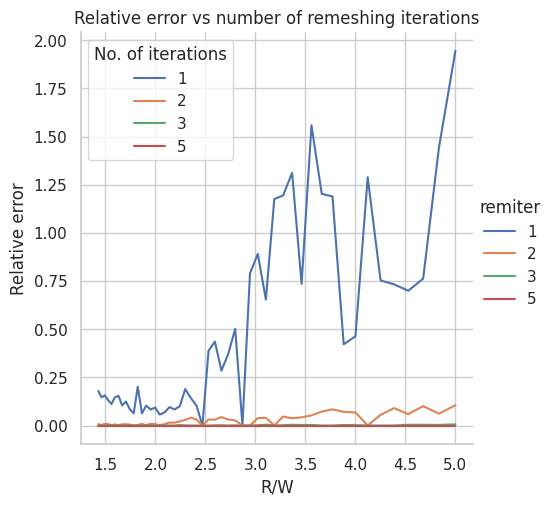

remiter
0    1.520356
1    0.479450
2    0.028596
3    0.001191
4    0.000065
5    0.000000
Name: error, dtype: float64

In [339]:
sns.set_theme()
sns.set_style("whitegrid")
res = pd.read_csv("ringloop.csv")

res["R/W"] = res["R"]/res["W"]

res["remiter"] = res["remiter"] + 1
for index, row in res.iterrows():
    if (res.iloc[index,1] == 1) & (index % 2 == 0):
       res.iloc[index,1] = res.iloc[index,1] - 1

print(res)
res = res.assign(error=None)
le = []
for index, row in res.iterrows():
    err = (row["numerical"] - (res[(res["simiter"] == row["simiter"]) & (res["remiter"] == 5)]["numerical"]))
    val = float((res[(res["simiter"] == row["simiter"]) & (res["remiter"] == 5)]["numerical"]).to_numpy()[0])
    err = float(err.to_numpy()[0])
    res.iloc[index,-1] = abs(err/val)



df = res[(res["remiter"] != 0) & (res["remiter"] != 4)].copy()
df["totaltime"] = df["meshtime"] + df["tthtime"] + df["nextime"]

pl = sns.relplot(df,x="R/W",y="error",palette="deep",kind="line",hue="remiter")
# pl.set(yscale="log")
plt.legend(title="No. of iterations")
plt.title("Relative error vs number of remeshing iterations")
plt.ylabel("Relative error")
plt.xlabel("R/W")
plt.show()



# sns.barplot(df,x="R/W",y="elementcount",palette="deep",hue="remiter",capsize=.1)
# plt.legend(title="No. of iterations")

# plt.show()

res.groupby("remiter")['error'].mean( )


## Investigate remesh iterations vs element count and meshing time

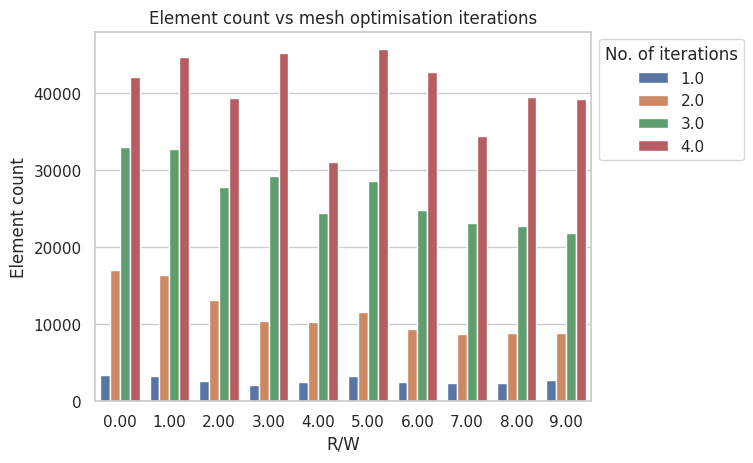

In [463]:


res["bins"] = pd.cut(res["R/W"],10)


df0 = res[res["remiter"] == 0].copy().groupby('bins').mean(numeric_only = True)
df1 = res[res["remiter"] == 1].copy().groupby('bins').mean(numeric_only = True)
df2 = res[res["remiter"] == 2].copy().groupby('bins').mean(numeric_only = True)
df3 = res[res["remiter"] == 3].copy().groupby('bins').mean(numeric_only = True)
df4 = res[res["remiter"] == 4].copy().groupby('bins').mean(numeric_only = True)

grouped = pd.concat([df1,df2,df3,df4])

# grouped = grouped.sort_values(by="R/W")
bp = sns.barplot(grouped,x="R/W",y="elementcount",palette="deep",hue="remiter")

def format_labels(x, pos):
    return f'{x:2.2f}'

bp.xaxis.set_major_formatter(FuncFormatter(format_labels))

plt.title("Element count vs mesh optimisation iterations")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title="No. of iterations")
plt.ylabel("Element count")
plt.show()

# grouped["totaltime"] = grouped["nextime"] + grouped["tthtime"] + grouped["meshtime"]

# bp = sns.relplot(grouped,x="R/W",y="tthtime",palette="deep",hue="remiter",kind="line")
# bp.xaxis.set_major_formatter(FuncFormatter(format_labels))
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title="No. of iterations")

# plt.show()
# grouped

## relative change in element count

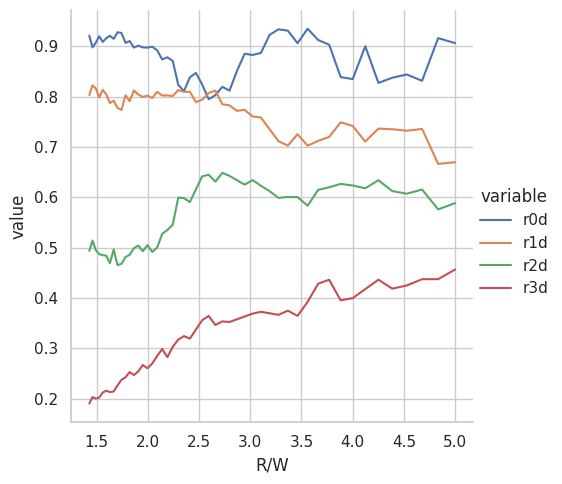

In [466]:
r0 = res[res["remiter"] == 0].copy()
r1 = res[res["remiter"] == 1].copy()
r2 = res[res["remiter"] == 2].copy()
r3 = res[res["remiter"] == 3].copy()
r4 = res[res["remiter"] == 4].copy()

r0d = ((r1["elementcount"].to_numpy() - r0["elementcount"].to_numpy())/(r1["elementcount"].to_numpy()))
r1d = ((r2["elementcount"].to_numpy() - r1["elementcount"].to_numpy())/(r2["elementcount"].to_numpy()))
r2d = ((r3["elementcount"].to_numpy() - r2["elementcount"].to_numpy())/(r3["elementcount"].to_numpy()))
r3d = ((r4["elementcount"].to_numpy() - r3["elementcount"].to_numpy())/(r4["elementcount"].to_numpy()))

dchange = pd.DataFrame()

dchange["r0d"] = r0d
dchange["r1d"] = r1d
dchange["r2d"] = r2d
dchange["r3d"] = r3d


# dchange["R/W"] = res["R/W"].unique()
# dchange["bins"] = pd.cut(dchange["R/W"],10)
# dchange = dchange.groupby("bins").mean(numeric_only= True)
# temp = dchange["R/W"].copy()
# dchange = dchange.drop(columns="R/W")
# dchange = dchange.melt()
# # extended_df = pd.concat([temp] * , ignore_index=True)
# dchange
# temp_c = pd.DataFrame(pd.concat([temp] * 4,ignore_index=True))
# dchange["R/W"] = temp_c["R/W"]

# sns.relplot(dchange,x="R/W",y="value",hue="variable",kind="line")

dchange = dchange.melt()

temp = pd.DataFrame()
temp["R/W"] = res["R/W"].unique()
con = pd.concat([temp] * 4,ignore_index=True)
dchange["R/W"] = con["R/W"]
dchange = dchange[dchange["value"] != 0]
sns.relplot(dchange,x="R/W",y="value",hue="variable",kind="line")